#pre-modeling


##dependencies

In [946]:
!pip install xport
!pip install xgboost


In [947]:
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## setup

In [948]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [949]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [950]:
!pip install xport

In [951]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


##PFAS dataframe

In [952]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS=df_PFAS.drop(columns = 'WTSB2YR') #drop weight
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [953]:
display(df_PFAS)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


##making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [954]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [955]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [956]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81,
 'LBDVTPLC': 0.03,
 'LBDVVBLC': 0.0,
 'LBDVXYLC': 63.52,
 

In [957]:
len(d_p)

131

In [958]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [959]:
type(d_p)
L2=np.array(list(d_p.items()))

##Decide which we can treat as binary


In [960]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 25 or val >= 75)}

In [961]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [962]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [963]:
len(binary_list)

17

In [964]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,...,LBDBSELC,LBDBMNLC,LBDFORLC,URDDEELC,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [965]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'LBDBSELC', 'LBDBMNLC', 'LBDFORLC', 'URDDEELC', 'URDDEALC', 'URDDHDLC',
       'LBDEOALC', 'LBDPFLLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=132)

In [966]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [967]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'LBDBSELC', 'LBDBMNLC', 'LBDFORLC', 'URDDEELC', 'URDDEALC', 'URDDHDLC',
       'LBDEOALC', 'LBDPFLLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=132)

##which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [968]:
intersection_set = set.intersection(set(df_PFAS.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [969]:
print(len(intersection_list))

0


In [970]:
intersection_list

[]

In [971]:
#percentage of what is binary in df
len(intersection_list)/len(df_PFAS)*100

0.0

In [972]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [973]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

0

In [974]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
df_PFAS=df_PFAS.drop(columns=cols_to_drop)

##taking log of continuous values

In [975]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = df_PFAS.columns[df_PFAS.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in df_PFAS.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    df_PFAS[col] = np.log(df_PFAS[col])

In [976]:
display(df_PFAS)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,-1.609438,0.0,1.098612,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.302585,0.0,-2.659260,1.0
1,73571.0,-1.203973,0.0,0.693147,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,0.262364,0.0,-2.659260,1.0,-2.659260,1.0
2,73574.0,-2.302585,0.0,-1.609438,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.356675,0.0,-2.659260,1.0,-2.659260,1.0
3,73576.0,-1.609438,0.0,2.028148,0.0,-2.659260,1.0,-2.65926,1.0,-1.609438,0.0,-0.510826,0.0,-2.659260,1.0,-2.302585,0.0
4,73577.0,-2.302585,0.0,0.182322,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.916291,0.0,-2.659260,1.0,-2.659260,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,-2.659260,1.0,-0.510826,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,-1.203973,0.0,-2.659260,1.0,-2.659260,1.0
2334,83712.0,-1.609438,0.0,1.163151,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.659260,1.0,-2.659260,1.0
2335,83713.0,-0.105361,0.0,0.095310,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,0.405465,0.0,-0.693147,0.0,-1.203973,0.0
2336,83717.0,-1.609438,0.0,0.336472,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.223144,0.0,-2.659260,1.0,-2.659260,1.0


##Splitting the data
We are trying to predict detect or not of Perfluorodecanoic acid (ug/L)

In [977]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDMPAHL', 'LBXMPAH'])
X_test=test.drop(columns=['LBDMPAHL', 'LBXMPAH' ])
Y_train=train['LBDMPAHL']
Y_test=test['LBDMPAHL']

In [978]:
include=list(X_train.columns)

##Scaled train and test

In [979]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#logistic regression for only PFAS group

In [980]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [981]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict_proba(X_test)
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(Y_test, prediction)
print(score)

0.5599078341013825


In [982]:
#the actual probability of detection
print(Y_test.value_counts())
336/(336+98)


1.0    243
0.0    191
Name: LBDMPAHL, dtype: int64


0.7741935483870968

In [983]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5599078341013825


In [984]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[  0 191]
 [  0 243]]


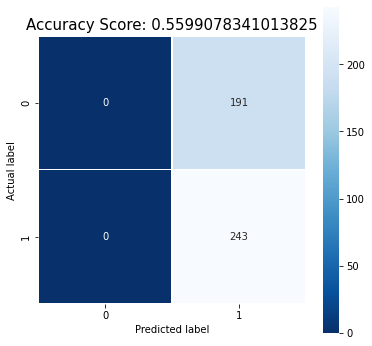

In [985]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

the predictor label is always 0 here. 
might as well be random guessing

##Roc curve

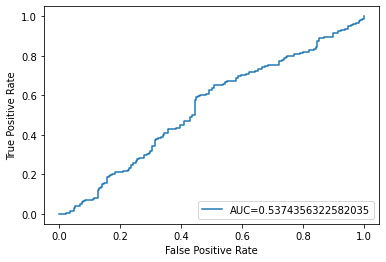

In [986]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# AUC = 0.5, need to improve model accuracy 

#Stepwise Logistic Regression

## stepwise regression (feature one)

In [987]:
include=list(X_train.columns)

In [988]:
import statsmodels.api as sm
#testing out for one at a time before creating loop
log_reg=sm.Logit(Y_train,X_train[include[0]]).fit()
#see it all
print(log_reg.summary())
#see log likelihood
print(log_reg.llf)
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
bic = (1 * math.log(len(Y_test))) - (2 * loglik)
print(bic)
#the built in bic is slightly different, we will stay with ours
log_reg.bic


Optimization terminated successfully.
         Current function value: 0.687379
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1733
Method:                           MLE   Df Model:                            0
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:              -0.0001758
Time:                        00:14:20   Log-Likelihood:                -1191.9
converged:                       True   LL-Null:                       -1191.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SEQN        2.737e-06   6.14e-07      4.460      0.000    1.53e-06    3.94e-06
-1191.9152108455391
2389.9034

2391.288607848419

In [989]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict= {}
loglik_dict= {}
causes_error=[]
#for loop for the first to include
for i in include:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[i]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict[i]=bic
    loglik_dict[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.687379
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.684015
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684004
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681823
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690331
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687186
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.687343
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686763
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685899
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677080
  

In [990]:
#looking at all the bic scores
bic_dict

{'LBDPFBSL': 2389.7776247269403,
 'LBDPFDEL': 2378.197499537686,
 'LBDPFDOL': 2400.4630334400617,
 'LBDPFHPL': 2384.772058001972,
 'LBDPFHSL': 2400.142042219356,
 'LBDPFNAL': 2399.2763942456904,
 'LBDPFUAL': 2388.571796044479,
 'LBXPFBS': 2389.2339256317136,
 'LBXPFDE': 2378.2356818763774,
 'LBXPFDO': 2393.9343451007567,
 'LBXPFHP': 2387.7655376864705,
 'LBXPFHS': 2370.634245201495,
 'LBXPFNA': 2354.185594916254,
 'LBXPFUA': 2390.3852774610064,
 'SEQN': 2389.903466225179}

In [991]:
#looking at all the log likelihoods
loglik_dict

{'LBDPFBSL': -1191.85229009642,
 'LBDPFDEL': -1186.0622275017927,
 'LBDPFDOL': -1197.1949944529806,
 'LBDPFHPL': -1189.3495067339356,
 'LBDPFHSL': -1197.0344988426277,
 'LBDPFNAL': -1196.601674855795,
 'LBDPFUAL': -1191.2493757551892,
 'LBXPFBS': -1191.5804405488066,
 'LBXPFDE': -1186.0813186711384,
 'LBXPFDO': -1193.930650283328,
 'LBXPFHP': -1190.846246576185,
 'LBXPFHS': -1182.2806003336973,
 'LBXPFNA': -1174.0562751910768,
 'LBXPFUA': -1192.156116463453,
 'SEQN': -1191.9152108455391}

In [992]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))],min(bic_dict.values()),loglik_dict[list(loglik_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))]])

LBXPFNA 2354.185594916254 -1174.0562751910768


In [993]:
used_step3=[]
used_step3.append(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))])
used_step3

['LBXPFNA']

In [994]:
log_reg=sm.Logit(Y_train,X_train[used_step3]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.677080
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1733
Method:                           MLE   Df Model:                            0
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.01481
Time:                        00:14:21   Log-Likelihood:                -1174.1
converged:                       True   LL-Null:                       -1191.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.4577      0.063     -7.248      0.000      -0.581      -0.334


In [995]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train[used_step3],Y_train)
prediction = clf.predict_proba(X_test[used_step3])
score = model.score(X_test[used_step3],Y_test)
print(score)

0.5967741935483871


In [996]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5967741935483871


In [997]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 55 136]
 [ 39 204]]


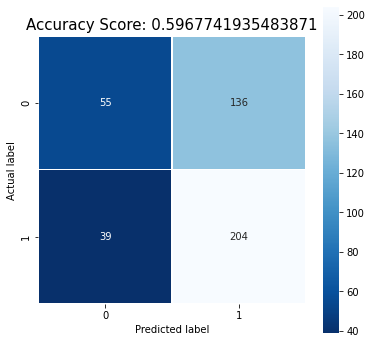

In [998]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Stepwise Regression (feature 2)

In [999]:
#we make a new list without the feature we are already using, and removing the chemicals that create singular matrix issues
#(which is Perfluorononanoic acid (ug/L) detection level)
include_2=list(X_train.drop(columns=used_step3).columns)

In [1000]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_2= {}
loglik_dict_2= {}
causes_error_2=[]
#for loop for the second to include
for i in include_2:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[[used_step3[0],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_2[i]=bic
    loglik_dict_2[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_2.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.676842
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677029
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676674
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.671546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.676765
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.676801
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676843
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676758
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676599
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676946
  

In [1001]:
causes_error_2

[]

In [1002]:
#looking at all the bic scores
bic_dict_2

{'LBDPFBSL': 2353.3653874448464,
 'LBDPFDEL': 2352.779644262989,
 'LBDPFDOL': 2353.727416866309,
 'LBDPFHPL': 2352.5186276784857,
 'LBDPFHSL': 2353.0925316514044,
 'LBDPFNAL': 2353.722288845627,
 'LBDPFUAL': 2353.8100824344483,
 'LBXPFBS': 2353.2191736420514,
 'LBXPFDE': 2354.010786910082,
 'LBXPFDO': 2354.1290223568253,
 'LBXPFHP': 2353.0703976348427,
 'LBXPFHS': 2334.995354584605,
 'LBXPFUA': 2354.009730885458,
 'SEQN': 2353.3625427132347}

In [1003]:
#looking at all the log likelihoods
loglik_dict_2

{'LBDPFBSL': -1173.646171455373,
 'LBDPFDEL': -1173.3532998644444,
 'LBDPFDOL': -1173.8271861661042,
 'LBDPFHPL': -1173.2227915721926,
 'LBDPFHSL': -1173.509743558652,
 'LBDPFNAL': -1173.8246221557633,
 'LBDPFUAL': -1173.868518950174,
 'LBXPFBS': -1173.5730645539754,
 'LBXPFDE': -1173.9688711879908,
 'LBXPFDO': -1174.0279889113624,
 'LBXPFHP': -1173.498676550371,
 'LBXPFHS': -1164.4611550252523,
 'LBXPFUA': -1173.9683431756787,
 'SEQN': -1173.644749089567}

In [1004]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))],min(bic_dict_2.values()),loglik_dict_2[list(loglik_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))]])

LBXPFHS 2334.995354584605 -1164.4611550252523


In [1005]:
used_step3.append(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))])
used_step3

['LBXPFNA', 'LBXPFHS']

In [1006]:
log_reg=sm.Logit(Y_train,X_train[used_step3]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.671546
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1732
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.02286
Time:                        00:14:21   Log-Likelihood:                -1164.5
converged:                       True   LL-Null:                       -1191.7
Covariance Type:            nonrobust   LLR p-value:                 1.563e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.3870      0.066     -5.859      0.000      -0.516      -0.258
LBXPFHS       -0.2347      0.

In [1007]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train[used_step3],Y_train)
prediction = clf.predict_proba(X_test[used_step3])
score = model.score(X_test[used_step3],Y_test)
print(score)

0.619815668202765


In [1008]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.619815668202765


In [1009]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 78 113]
 [ 52 191]]


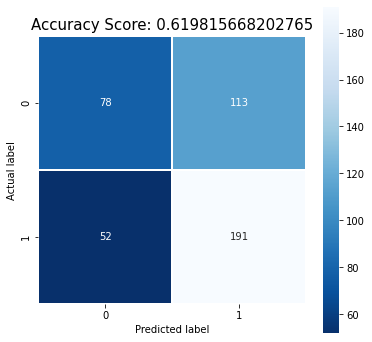

In [1010]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Stepwise Regression (feature 3)




In [1011]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_3=list(X_train.drop(columns=used_step3).columns)

In [1012]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_3= {}
loglik_dict_3= {}
causes_error_3=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[[used_step3[0],used_step3[1],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_3[i]=bic
    loglik_dict_3[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_3.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.667832
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.668794
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.670807
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.671531
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.667653
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667898
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667543
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667824
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.671546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.670161
  

In [1013]:
causes_error_3

[]

In [1014]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglikedictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [1015]:
print(bic_loglik(bic_dict_3,loglik_dict_3))

('LBXPFHP', 2321.1110250010192, -1157.5189902334594)


In [1016]:
used_step3.append(list(bic_dict_3.keys())[list(bic_dict_3.values()).index(min(bic_dict_3.values()))])
used_step3

['LBXPFNA', 'LBXPFHS', 'LBXPFHP']

In [1017]:
log_reg=sm.Logit(Y_train,X_train[used_step3]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.667543
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1731
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.02869
Time:                        00:14:22   Log-Likelihood:                -1157.5
converged:                       True   LL-Null:                       -1191.7
Covariance Type:            nonrobust   LLR p-value:                 1.422e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.1952      0.083     -2.339      0.019      -0.359      -0.032
LBXPFHS       -0.3505      0.

In [1018]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train[used_step3],Y_train)
y_pred = model.predict_proba(X_test[used_step3])
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(Y_test, prediction)
print(score)

0.6105990783410138


In [1019]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.6105990783410138


In [1020]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 76 115]
 [ 54 189]]


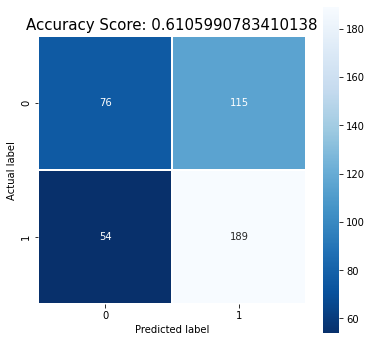

In [1021]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

done, no longer improving

## Stepwise Regression (feature 4)




In [1022]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_4=list(X_train.drop(columns=used_step3).columns)

In [1023]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_4= {}
loglik_dict_4= {}
causes_error_4=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[[used_step3[0],used_step3[1],used_step3[2],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_4[i]=bic
    loglik_dict_4[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_4.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.667463
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667535
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667270
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667542
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.667542
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667435
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667543
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667518
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667541
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665689
  

In [1024]:
causes_error_4

['LBXPFHP']

In [1025]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglikedictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [1026]:
print(bic_loglik(bic_dict_4,loglik_dict_4))

('LBDPFDOL', 2313.211972555402, -1153.5694640106508)


In [1027]:
log_reg=sm.Logit(Y_train,X_train[used_step3]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.667543
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1731
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.02869
Time:                        00:14:23   Log-Likelihood:                -1157.5
converged:                       True   LL-Null:                       -1191.7
Covariance Type:            nonrobust   LLR p-value:                 1.422e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.1952      0.083     -2.339      0.019      -0.359      -0.032
LBXPFHS       -0.3505      0.

In [1028]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train[used_step3],Y_train)
y_pred = model.predict_proba(X_test[used_step3])
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(Y_test, prediction)
print(score)

0.6105990783410138


In [1029]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.6105990783410138


In [1030]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 76 115]
 [ 54 189]]


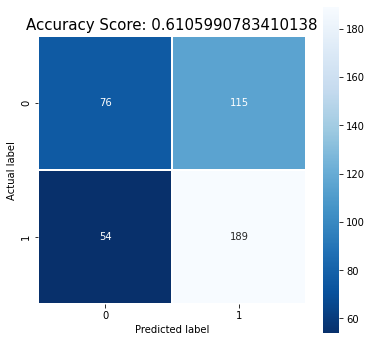

In [1031]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

done, no longer improving

## ROC curves

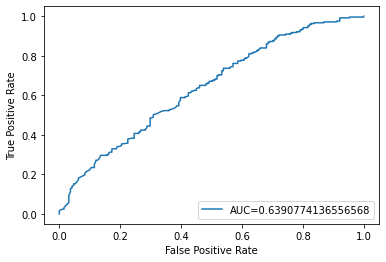

In [1032]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Naiman's stepwise

In [1033]:
DFTrain, DFTest = X_train.copy(), X_test.copy()
DFTrain['Y']=Y_train
DFTest['Y']=Y_test

In [1034]:
used=[]
unused=[c for c in DFTrain.columns if c!="Y"]

ctr=0
maxloglike=-9999999999
for c in unused:
    #print(c)
    LR = LogisticRegression()
    DFT=DFTrain.loc[:,used+[c]]
    LR.fit(DFT,DFTrain["Y"])
    plog=LR.predict_log_proba(DFT)
    plog0=plog[:,0]
    plog1=plog[:,1]
    loglike=np.sum(DFTrain["Y"]*plog1+(1-DFTrain["Y"])*plog0)
    if loglike>maxloglike:
        maxloglike=loglike
        bestc=c

    
print("variable added = "+str(bestc)+" maximum likelihood = " + str(maxloglike))
used.append(bestc)
unused=[c for c in unused if c!=bestc]
for ctr in range(25):
    maxloglike=-99999999
    for c in unused:
        LR = LogisticRegression()
        DFT=DFTrain.loc[:,used+[c]]
        try:
            LR.fit(DFT,DFTrain["Y"])
            plog=LR.predict_log_proba(DFT)
            plog0=plog[:,0]
            plog1=plog[:,1]
            loglike=np.sum(DFTrain["Y"]*plog1+(1-DFTrain["Y"])*plog0)
            if loglike>maxloglike:
                maxloglike=loglike
                bestc=c
        except:
            pass
    print("variable added = "+str(bestc)+" maximum likelihood = " + str(maxloglike))
    used.append(bestc)
    unused=[c for c in unused if c!=bestc]


variable added = LBXPFHS maximum likelihood = -1160.8573269475846
variable added = LBXPFDO maximum likelihood = -1156.9663183665489
variable added = LBXPFNA maximum likelihood = -1152.4466502007176
variable added = LBXPFUA maximum likelihood = -1150.7643696517891
variable added = LBXPFDE maximum likelihood = -1148.5163938814198
variable added = LBDPFBSL maximum likelihood = -1148.1895954258396
variable added = LBXPFBS maximum likelihood = -1146.8891679261214
variable added = LBDPFHPL maximum likelihood = -1146.5497651573028
variable added = LBDPFUAL maximum likelihood = -1146.3698298945849
variable added = LBDPFHSL maximum likelihood = -1146.359720370524


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = LBDPFDOL maximum likelihood = -1146.364216915475
variable added = LBXPFHP maximum likelihood = -1146.3492441803
variable added = LBDPFDEL maximum likelihood = -1146.3629969913864
variable added = LBDPFNAL maximum likelihood = -1146.363030713405
variable added = SEQN maximum likelihood = -1191.91521079946
variable added = SEQN maximum likelihood = -99999999
variable added = SEQN maximum likelihood = -99999999
variable added = SEQN maximum likelihood = -99999999
variable added = SEQN maximum likelihood = -99999999
variable added = SEQN maximum likelihood = -99999999
variable added = SEQN maximum likelihood = -99999999
variable added = SEQN maximum likelihood = -99999999
variable added = SEQN maximum likelihood = -99999999
variable added = SEQN maximum likelihood = -99999999
variable added = SEQN maximum likelihood = -99999999
variable added = SEQN maximum likelihood = -99999999


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [1035]:
print(used)

['LBXPFHS', 'LBXPFDO', 'LBXPFNA', 'LBXPFUA', 'LBXPFDE', 'LBDPFBSL', 'LBXPFBS', 'LBDPFHPL', 'LBDPFUAL', 'LBDPFHSL', 'LBDPFDOL', 'LBXPFHP', 'LBDPFDEL', 'LBDPFNAL', 'SEQN', 'SEQN', 'SEQN', 'SEQN', 'SEQN', 'SEQN', 'SEQN', 'SEQN', 'SEQN', 'SEQN', 'SEQN', 'SEQN']


In [1036]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(DFTrain[used],DFTrain["Y"])
y_pred = model.predict_proba(DFTest[used])
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(DFTest["Y"], prediction)
print(score)

0.5599078341013825


In [1037]:
#for later use
y_pred_steplog = model.predict_proba(DFTest[used])
prediction_steplog = [round(value) for value in y_pred_steplog[:,1]]
score_steplog = metrics.accuracy_score(DFTest["Y"], prediction_steplog)

In [1038]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(DFTest["Y"], predictions)
print(accuracy)

0.5599078341013825


In [1039]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(DFTest["Y"], predictions)
print(cm)

[[  0 191]
 [  0 243]]


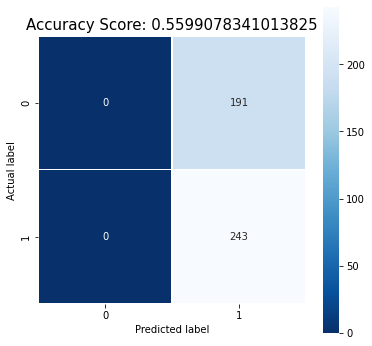

In [1040]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

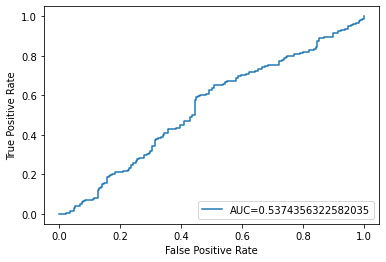

In [1041]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(DFTest["Y"],  y_pred[:,1])
auc = metrics.roc_auc_score(DFTest["Y"],  y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#XGBOOST

In [1042]:
!pip install xgboost

In [1043]:
#removing continuous 
intersection_set = set.intersection(set(df_PFAS.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [1044]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [1045]:
cols_to_drop

[]

In [1046]:
X_train

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
1317,79324.0,-0.510826,0.0,0.587787,0.0,-2.302585,0.0,-2.659260,1.0,-0.356675,0.0,-1.609438,0.0,-2.659260,1.0
1868,81772.0,-1.609438,0.0,0.916291,0.0,-2.659260,1.0,-2.659260,1.0,0.336472,0.0,-1.609438,0.0,-2.659260,1.0
2102,82717.0,-1.609438,0.0,0.470004,0.0,-2.659260,1.0,-2.659260,1.0,0.336472,0.0,-2.302585,0.0,-2.659260,1.0
1068,78233.0,-1.609438,0.0,-0.105361,0.0,-2.659260,1.0,-1.203973,0.0,-0.693147,0.0,-2.659260,1.0,-2.659260,1.0
792,77004.0,-2.302585,0.0,2.028148,0.0,-2.659260,1.0,-2.659260,1.0,-0.356675,0.0,-2.659260,1.0,-2.659260,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,81740.0,-1.203973,0.0,0.641854,0.0,-2.659260,1.0,-2.659260,1.0,-0.105361,0.0,-0.916291,0.0,-1.609438,0.0
28,73684.0,-1.203973,0.0,0.788457,0.0,-2.659260,1.0,-1.609438,0.0,0.095310,0.0,-1.609438,0.0,-2.659260,1.0
707,76653.0,-1.609438,0.0,0.916291,0.0,-2.659260,1.0,-2.659260,1.0,-0.510826,0.0,-2.302585,0.0,-2.659260,1.0
2238,83323.0,-0.510826,0.0,0.262364,0.0,-2.659260,1.0,-2.302585,0.0,0.095310,0.0,-0.693147,0.0,-2.659260,1.0


In [1047]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict_proba(X_test)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.5967741935483871


## Roc curve

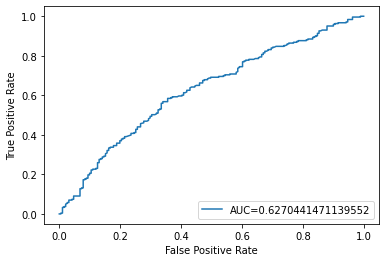

In [1048]:
#ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test,  y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

area is lower*

In [1049]:
X_train

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
1317,79324.0,-0.510826,0.0,0.587787,0.0,-2.302585,0.0,-2.659260,1.0,-0.356675,0.0,-1.609438,0.0,-2.659260,1.0
1868,81772.0,-1.609438,0.0,0.916291,0.0,-2.659260,1.0,-2.659260,1.0,0.336472,0.0,-1.609438,0.0,-2.659260,1.0
2102,82717.0,-1.609438,0.0,0.470004,0.0,-2.659260,1.0,-2.659260,1.0,0.336472,0.0,-2.302585,0.0,-2.659260,1.0
1068,78233.0,-1.609438,0.0,-0.105361,0.0,-2.659260,1.0,-1.203973,0.0,-0.693147,0.0,-2.659260,1.0,-2.659260,1.0
792,77004.0,-2.302585,0.0,2.028148,0.0,-2.659260,1.0,-2.659260,1.0,-0.356675,0.0,-2.659260,1.0,-2.659260,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,81740.0,-1.203973,0.0,0.641854,0.0,-2.659260,1.0,-2.659260,1.0,-0.105361,0.0,-0.916291,0.0,-1.609438,0.0
28,73684.0,-1.203973,0.0,0.788457,0.0,-2.659260,1.0,-1.609438,0.0,0.095310,0.0,-1.609438,0.0,-2.659260,1.0
707,76653.0,-1.609438,0.0,0.916291,0.0,-2.659260,1.0,-2.659260,1.0,-0.510826,0.0,-2.302585,0.0,-2.659260,1.0
2238,83323.0,-0.510826,0.0,0.262364,0.0,-2.659260,1.0,-2.302585,0.0,0.095310,0.0,-0.693147,0.0,-2.659260,1.0


#Random Forest

[Classification with Random Forests in Python
](https://towardsdatascience.com/classification-with-random-forests-in-python-29b8381680ed)

In [1050]:
from sklearn.ensemble import RandomForestClassifier
 
# create regressor object
regressor = RandomForestClassifier(random_state = 0)
 
#fit the regressor with x and y data
regressor.fit(X_train, Y_train) 
#Prediction = regressor.predict_proba(X_test)
y_pred = regressor.predict_proba(X_test)
prediction = [round(value) for value in y_pred[:,1]]

In [1051]:
print(prediction)

[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 

In [1052]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.5852534562211982 % correct


In [1053]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[ 92  99]
 [ 81 162]]


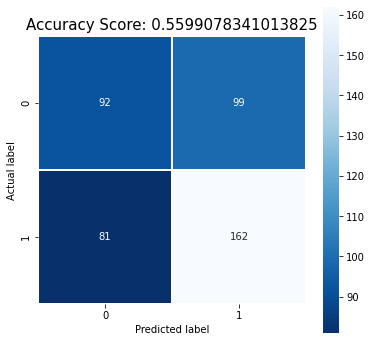

In [1054]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

In [1055]:
metrics.f1_score(Y_test,prediction)

0.6428571428571429

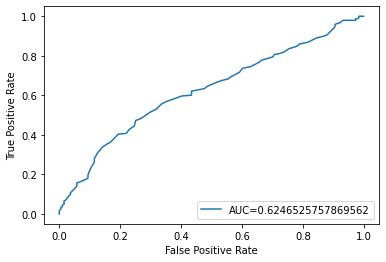

In [1056]:
#ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test,  y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Nearest Neighbors

In [1057]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_scaled, Y_train)
y_pred = classifier.predict_proba(X_test_scaled)
prediction = [round(value) for value in y_pred[:,1]]

In [1058]:
print(prediction)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 

In [1059]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.5668202764976958 % correct


In [1060]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[ 97  94]
 [ 94 149]]


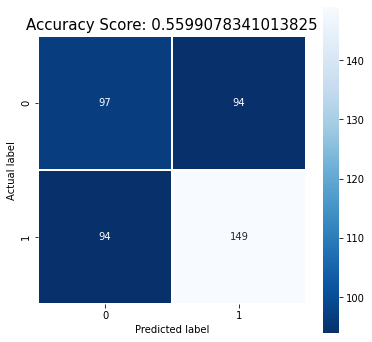

In [1061]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

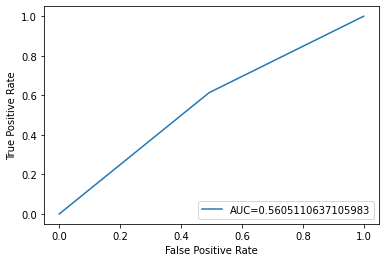

In [1062]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#KNN-did k=5

In [1063]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_scaled, Y_train)
y_pred = classifier.predict_proba(X_test_scaled)
prediction = [round(value) for value in y_pred[:,1]]

In [1064]:
print(prediction)

[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 

In [1065]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.5898617511520737 % correct


In [1066]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[ 92  99]
 [ 79 164]]


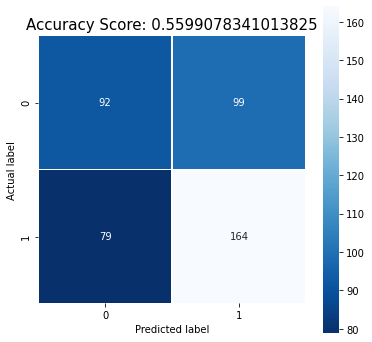

In [1067]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

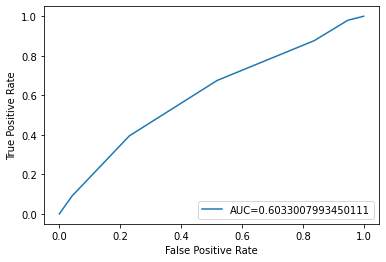

In [1068]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Lasso Regression

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [1069]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_scaled, Y_train)

Lasso(alpha=1)

In [1070]:
print('R squared training set', round(reg.score(X_train_scaled, Y_train)*100, 2))
print('R squared test set', round(reg.score(X_test_scaled, Y_test)*100, 2))

R squared training set 0.0
R squared test set -0.01


In [1071]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test_scaled)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.25
MSE test set 0.25


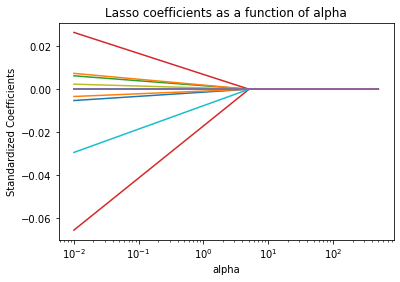

In [1072]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [1073]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_lasso = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_lasso.fit(X_train_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [1074]:
model_lasso.alpha_


0.0024592839624413836

In [1075]:
# Set best alpha
lasso_best = Lasso(alpha=model_lasso.alpha_)
lasso_best.fit(X_train_scaled, Y_train)

Lasso(alpha=0.0024592839624413836)

In [1076]:
Lasso(alpha=model_lasso.alpha_)

Lasso(alpha=0.0024592839624413836)

In [1077]:
print(list(zip(lasso_best.coef_, X_train)))

[(-0.01301665382158367, 'SEQN'), (-0.03661553431258233, 'LBXPFDE'), (0.0018278830559341215, 'LBDPFDEL'), (-0.06893997980869457, 'LBXPFHS'), (-0.0, 'LBDPFHSL'), (-0.04893439182058696, 'LBXPFBS'), (-0.05122242680747926, 'LBDPFBSL'), (-0.002711108572642759, 'LBXPFHP'), (0.006892946896060499, 'LBDPFHPL'), (-0.03259924304897923, 'LBXPFNA'), (-0.0010130761063526015, 'LBDPFNAL'), (0.04171710520707469, 'LBXPFUA'), (0.0025631319917290532, 'LBDPFUAL'), (0.03167697361773005, 'LBXPFDO'), (-0.0017341577279341022, 'LBDPFDOL')]


In [1078]:
print('R squared training set', round(lasso_best.score(X_train_scaled, Y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test_scaled, Y_test)*100, 2))

R squared training set 5.35
R squared test set 5.58


In [1079]:
mean_squared_error(Y_test, lasso_best.predict(X_test_scaled))

0.23264973198299488

run ROC curve instead!!!

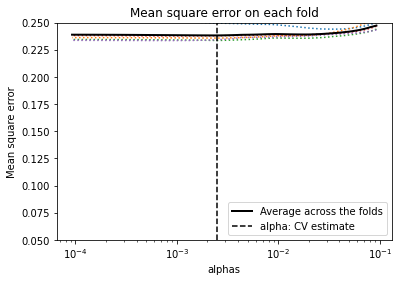

In [1080]:
plt.semilogx(model_lasso.alphas_, model_lasso.mse_path_, ":")
plt.plot(
    model_lasso.alphas_ ,
    model_lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.05, 0.25
plt.ylim(ymin, ymax);

not being able to use proba might be enough reason to not include this method, instead using the predictions with the documented threasholds to do it.

In [1081]:
reg = Lasso(alpha=model_lasso.alpha_)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

In [1082]:
y_pred

array([0.69792571, 0.59660527, 0.37346434, 0.77130347, 0.57674069,
       0.43540729, 0.72202495, 0.61048028, 0.68037034, 0.48486393,
       0.53250414, 0.52834324, 0.43831932, 0.63316868, 0.53068418,
       0.39517113, 0.60001621, 0.53273704, 0.59610205, 0.51604232,
       0.78231944, 0.6424831 , 0.66504158, 0.5281166 , 0.52928281,
       0.46571473, 0.4936626 , 0.53759633, 0.6611049 , 0.53978813,
       0.39543527, 0.43517584, 0.52582048, 0.58448036, 0.4984637 ,
       0.55797525, 0.53017382, 0.65266445, 0.5101111 , 0.65863443,
       0.42442152, 0.37013929, 0.58972722, 0.47358431, 0.49493501,
       0.45966229, 0.47825685, 0.6390197 , 0.56742513, 0.61539587,
       0.61006241, 0.51975781, 0.66107669, 0.52729632, 0.489197  ,
       0.45175792, 0.92668405, 0.54166445, 0.6236223 , 0.49825164,
       0.53113112, 0.4486017 , 0.57555787, 0.77030596, 0.48067114,
       0.42104894, 0.4892928 , 0.76225447, 0.3664447 , 0.46404889,
       0.57465466, 0.46606974, 0.57719552, 0.46481386, 0.46143

In [1083]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [1084]:
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [1085]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.4400921658986175 % correct


In [1086]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[191   0]
 [243   0]]


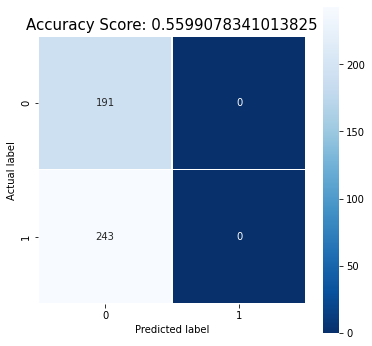

In [1087]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

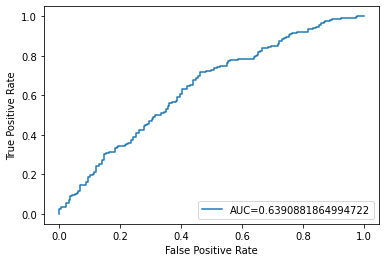

In [1088]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred)
auc = metrics.roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#LDA

[Comparison of LDA and PCA 2D projection of Iris dataset](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

In [1089]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
LinearDiscriminantAnalysis()
y_pred=clf.predict_proba(X_test)
prediction = [round(value) for value in y_pred[:,1]]
print(prediction)

[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 

In [1090]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.6244239631336406 % correct


In [1091]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[ 88 103]
 [ 60 183]]


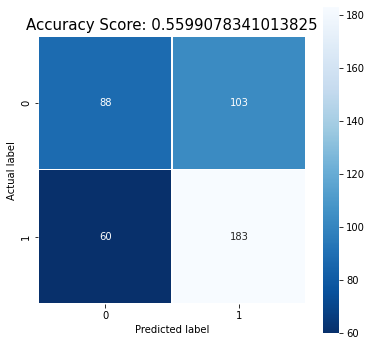

In [1092]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

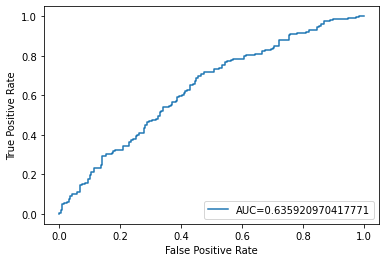

In [1093]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

special we need to redefine DF


In [1094]:
DF2=df_PFAS.copy()

In [1095]:
DF2

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,-1.609438,0.0,1.098612,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.302585,0.0,-2.659260,1.0
1,73571.0,-1.203973,0.0,0.693147,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,0.262364,0.0,-2.659260,1.0,-2.659260,1.0
2,73574.0,-2.302585,0.0,-1.609438,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.356675,0.0,-2.659260,1.0,-2.659260,1.0
3,73576.0,-1.609438,0.0,2.028148,0.0,-2.659260,1.0,-2.65926,1.0,-1.609438,0.0,-0.510826,0.0,-2.659260,1.0,-2.302585,0.0
4,73577.0,-2.302585,0.0,0.182322,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.916291,0.0,-2.659260,1.0,-2.659260,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,-2.659260,1.0,-0.510826,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,-1.203973,0.0,-2.659260,1.0,-2.659260,1.0
2334,83712.0,-1.609438,0.0,1.163151,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.659260,1.0,-2.659260,1.0
2335,83713.0,-0.105361,0.0,0.095310,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,0.405465,0.0,-0.693147,0.0,-1.203973,0.0
2336,83717.0,-1.609438,0.0,0.336472,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.223144,0.0,-2.659260,1.0,-2.659260,1.0


In [1096]:
X=DF2.drop(columns=['LBDMPAHL', 'LBXMPAH'])
y=DF2['LBDMPAHL']

In [1097]:
X_r = clf.fit(X, y).transform(X)

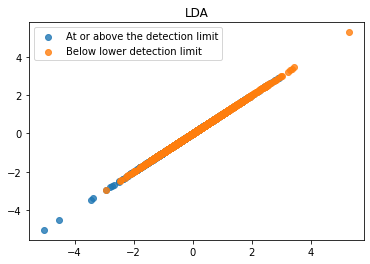

In [1098]:
plt.figure()
labels = ['At or above the detection limit','Below lower detection limit']
for i,label in zip([0, 1],labels):
    plt.scatter(
        X_r[y == i], X_r[y == i], alpha=0.8, label=label
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")

plt.show()

horrible

#SVM

##linear kernal

In [1099]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)
#y_pred = svclassifier.predict_proba(X_test)
y_pred = svclassifier.predict(X_test)

In [1100]:
y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0.

In [1101]:
count= 0
for i, j in zip(y_pred,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(y_pred))
print(percent_correct,'% correct')

0.5253456221198156 % correct


In [1102]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [1103]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, y_pred)
print(cm)

[[ 36 155]
 [ 51 192]]


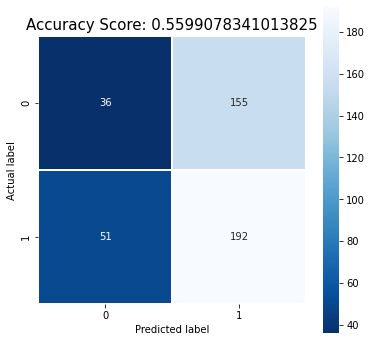

In [1104]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

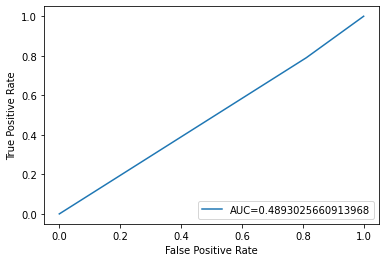

In [1105]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred)
auc = metrics.roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Poly kernal

In [1106]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, Y_train)
#y_pred = svclassifier.predict_proba(X_test)
y_pred = svclassifier.predict(X_test)

In [1107]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [1108]:
count= 0
for i, j in zip(y_pred,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(y_pred))
print(percent_correct,'% correct')

0.5599078341013825 % correct


In [1109]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [1110]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, y_pred)
print(cm)

[[  0 191]
 [  0 243]]


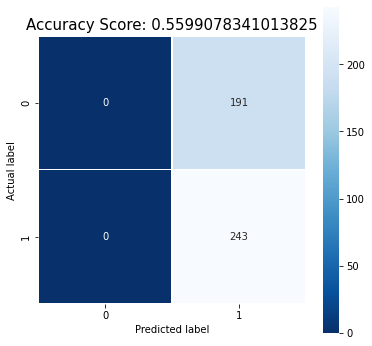

In [1111]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

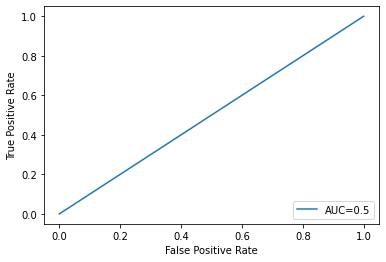

In [1112]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred)
auc = metrics.roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##rbf kernal

In [1113]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)
#y_pred = svclassifier.predict_proba(X_test)
y_pred = svclassifier.predict(X_test)

In [1114]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [1115]:
count= 0
for i, j in zip(y_pred,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(y_pred))
print(percent_correct,'% correct')

0.5599078341013825 % correct


In [1116]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [1117]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, y_pred)
print(cm)

[[  0 191]
 [  0 243]]


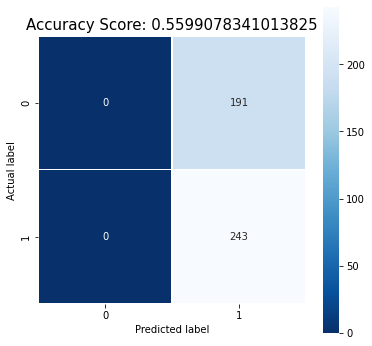

In [1118]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

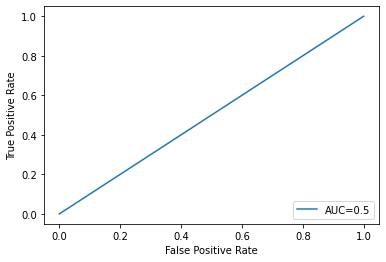

In [1119]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred)
auc = metrics.roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Naive Bayes

In [1120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [1121]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train)
y_pred = classifier.predict_proba(X_test_scaled)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.5368663594470046


In [1122]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[139  52]
 [149  94]]


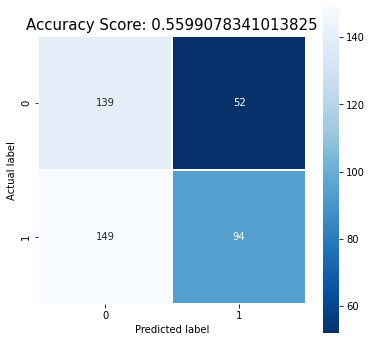

In [1123]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

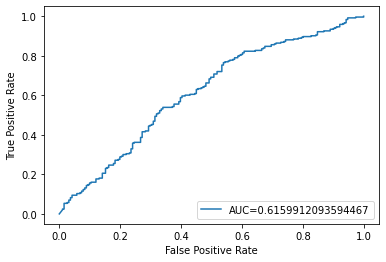

In [1124]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#All compared


dataframe first

In [1125]:
test_Df= pd.DataFrame(columns = ['Actual', 'Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes'])
test_Df['Actual']=Y_test

plot_Df= pd.DataFrame(columns = ['Actual', 'Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes'])
plot_Df['Actual']=Y_test


#logistic regression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred_log = model.predict_proba(X_test)
prediction_log = [round(value) for value in y_pred_log[:,1]]
score_log = metrics.accuracy_score(Y_test, prediction_log)
test_Df['Logistic Regression']=prediction_log
plot_Df['Logistic Regression']=y_pred_log[:,1]


#stepwise with 3 logistic
model = LogisticRegression()
model.fit(X_train[used_step3],Y_train)
y_pred_steplog3 = model.predict_proba(X_test[used_step3])
prediction_steplog3 = [round(value) for value in y_pred_steplog3[:,1]]
score_steplog3 = metrics.accuracy_score(Y_test, prediction_steplog3)
test_Df['Stepwise Logistic Regression 3']=prediction_steplog3
plot_Df['Stepwise Logistic Regression 3']=y_pred_steplog3[:,1]


#stepwise from naiman already saved
#y_pred_steplog
#prediction_steplog
#score_steplog
test_Df['Stepwise Logistic Regression']=prediction_steplog
plot_Df['Stepwise Logistic Regression']=y_pred_steplog[:,1]


#XGBOOST
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred_XG = model.predict_proba(X_test)
prediction_XG = [round(value) for value in y_pred_XG[:,1]]
score_XG = metrics.accuracy_score(Y_test, prediction_XG)
test_Df['XGBOOST']=prediction_XG
plot_Df['XGBOOST']=y_pred_XG[:,1]


#Random Forest
regressor = RandomForestClassifier(random_state = 0)
regressor.fit(X_train, Y_train) 
y_pred_forest= regressor.predict_proba(X_test)
prediction_forest = [round(value) for value in y_pred_forest[:,1]]
score_forest = metrics.accuracy_score(Y_test, prediction_forest)
test_Df['Random Forest']=prediction_forest
plot_Df['Random Forest']=y_pred_forest[:,1]


#NN
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_scaled, Y_train)
y_pred_NN = classifier.predict_proba(X_test_scaled)
prediction_NN = [round(value) for value in y_pred_NN[:,1]]
count= 0
for i, j in zip(prediction_NN,Y_test):
  if i==j:
    count+=1
score_NN=(count/len(Y_test))
test_Df['NN']=prediction_NN
plot_Df['NN']=y_pred_NN[:,1]


#KNN-K=5
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_scaled, Y_train)
y_pred_KNN = classifier.predict_proba(X_test_scaled)
prediction_KNN = [round(value) for value in y_pred_KNN[:,1]]
count= 0
for i, j in zip(prediction_KNN,Y_test):
  if i==j:
    count+=1
score_KNN=(count/len(Y_test))
test_Df['KNN-5']=prediction_KNN
plot_Df['KNN-5']=y_pred_KNN[:,1]


#LASSO
reg = Lasso(alpha=model_lasso.alpha_)
reg.fit(X_train_scaled, Y_train)
y_pred_lasso=reg.predict(X_test_scaled)
prediction_lasso=y_pred_lasso.copy()
for i in range(len(prediction_lasso)):
  if prediction_lasso[i] >= 0.10:
    prediction_lasso[i]=0
  elif prediction_lasso[i] < 0.10:
    prediction_lasso[i]=1
count= 0
for i, j in zip(prediction_lasso,Y_test):
  if i==j:
    count+=1
score_lasso=(count/len(Y_test))
test_Df['Lasso']=prediction_lasso
plot_Df['Lasso']=y_pred_lasso


#LDA
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
LinearDiscriminantAnalysis()
y_pred_LDA=clf.predict_proba(X_test)
prediction_LDA = [round(value) for value in y_pred_LDA[:,1]]
count= 0
for i, j in zip(prediction_LDA,Y_test):
  if i==j:
    count+=1
score_LDA=(count/len(Y_test))
test_Df['LDA']=prediction_LDA
plot_Df['LDA']=y_pred_LDA[:,1]


#SVM-Linear
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)
y_pred_SVML = svclassifier.predict(X_test)
prediction_SVML=y_pred_SVML.copy()
for i in range(len(prediction_SVML)):
  if prediction_SVML[i] >= 0.10:
    prediction_SVML[i]=0
  elif prediction_SVML[i] < 0.10:
    prediction_SVML[i]=1
count= 0
for i, j in zip(prediction_SVML,Y_test):
  if i==j:
    count+=1
score_SVML=(count/len(prediction_SVML))
test_Df['SVM Linear']=prediction_SVML
plot_Df['SVM Linear']=y_pred_SVML


#SVM-Poly
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, Y_train)
y_pred_SVMP = svclassifier.predict(X_test)
prediction_SVMP=y_pred_SVMP.copy()
for i in range(len(prediction_SVMP)):
  if prediction_SVMP[i] >= 0.10:
    prediction_SVMP[i]=0
  elif prediction_SVMP[i] < 0.10:
    prediction_SVMP[i]=1
count= 0
for i, j in zip(prediction_SVMP,Y_test):
  if i==j:
    count+=1
score_SVMP=(count/len(prediction_SVMP))
test_Df['SVM Poly']=prediction_SVMP
plot_Df['SVM Poly']=y_pred_SVMP


#SVM-RBF
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)
y_pred_SVMR = svclassifier.predict(X_test)
prediction_SVMR=y_pred_SVMR.copy()
for i in range(len(prediction_SVMR)):
  if prediction_SVMR[i] >= 0.10:
    prediction_SVMR[i]=0
  elif prediction_SVMR[i] < 0.10:
    prediction_SVMR[i]=1
count= 0
for i, j in zip(prediction_SVMR,Y_test):
  if i==j:
    count+=1
score_SVMR=(count/len(prediction_SVMR))
test_Df['SVM RBF']=prediction_SVMR
plot_Df['SVM RBF']=y_pred_SVMR


#Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train)
y_pred_NB = classifier.predict_proba(X_test_scaled)
prediction_NB = [round(value) for value in y_pred_NB[:,1]]
score_NB =metrics.accuracy_score(Y_test, prediction_NB)
test_Df['Naive Bayes']=prediction_NB
plot_Df['Naive Bayes']=y_pred_NB[:,1]

In [1126]:
test_Df

,Actual,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
2159,0.0,1,1,1,1,1,1,1,0.0,1,1.0,0.0,0.0,1
1108,1.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
909,0.0,1,0,1,0,0,1,0,0.0,0,0.0,0.0,0.0,0
484,0.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,1
1846,0.0,1,1,1,0,0,0,1,0.0,1,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1.0,1,0,1,1,0,0,0,0.0,0,0.0,0.0,0.0,0
1830,1.0,1,0,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
1327,0.0,1,0,1,0,0,0,0,0.0,0,0.0,0.0,0.0,0
1279,1.0,1,0,1,0,0,1,1,0.0,0,0.0,0.0,0.0,0


In [1127]:
test_Df.to_csv('test_bin_pfas_run10_c3.csv')

In [1128]:
plot_Df

,Actual,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
2159,0.0,0.556519,0.654976,0.556519,0.709952,0.68,1.0,1.0,0.697926,0.699805,0.0,1.0,1.0,0.725835
1108,1.0,0.553446,0.614097,0.553447,0.627770,0.89,1.0,0.8,0.596605,0.609749,1.0,1.0,1.0,0.393229
909,0.0,0.552838,0.348388,0.552839,0.234420,0.26,1.0,0.4,0.373464,0.368162,1.0,1.0,1.0,0.127308
484,0.0,0.551618,0.674292,0.551619,0.735996,0.78,1.0,0.6,0.771303,0.772727,1.0,1.0,1.0,0.959173
1846,0.0,0.555647,0.514952,0.555648,0.446029,0.41,0.0,0.6,0.576741,0.577842,1.0,1.0,1.0,0.525363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1.0,0.553754,0.474056,0.553754,0.529038,0.37,0.0,0.2,0.458541,0.444817,1.0,1.0,1.0,0.051209
1830,1.0,0.555603,0.475928,0.555603,0.530264,0.74,1.0,0.8,0.512578,0.501594,1.0,1.0,1.0,0.113089
1327,0.0,0.554077,0.327739,0.554078,0.406595,0.34,0.0,0.2,0.342547,0.324095,1.0,1.0,1.0,0.174850
1279,1.0,0.553952,0.444920,0.553952,0.397443,0.48,1.0,0.6,0.399939,0.383831,1.0,1.0,1.0,0.062350


In [1129]:
plot_Df.to_csv('plot_pfas_run10_c3.csv')

In [1130]:
scores={}
L1=['Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes']
L2=[score_log,score_steplog3,score_steplog,score_XG,score_forest,score_NN,score_KNN,score_lasso,score_LDA,score_SVML,score_SVMP,score_SVMR,score_NB]
for i,j in zip(L1,L2):
  scores[i]=float(j*100)
sorted(scores.items(), key=lambda x: x[1])

[('Lasso', 44.00921658986175),
 ('SVM Poly', 44.00921658986175),
 ('SVM RBF', 44.00921658986175),
 ('SVM Linear', 47.465437788018434),
 ('Naive Bayes', 53.686635944700456),
 ('Logistic Regression', 55.99078341013824),
 ('Stepwise Logistic Regression', 55.99078341013824),
 ('NN', 56.68202764976959),
 ('Random Forest', 58.525345622119815),
 ('KNN-5', 58.986175115207374),
 ('XGBOOST', 59.67741935483871),
 ('Stepwise Logistic Regression 3', 61.05990783410138),
 ('LDA', 62.44239631336406)]

In [1131]:
scores_df=pd.DataFrame([list(scores.values())],columns=[list(scores.keys())])
scores_df

,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
0,55.990783,61.059908,55.990783,59.677419,58.525346,56.682028,58.986175,44.009217,62.442396,47.465438,44.009217,44.009217,53.686636


In [1132]:
scores_df.to_csv('scores_pfas_run10_c3.csv')

Stepwise logistic 3

LDA

XGBoost

Random Forest

KNN-5

Logistic Regression

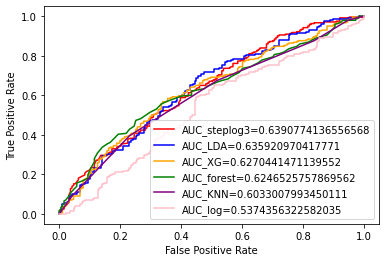

In [1133]:
#ROC curves on same plot
fpr_steplog3, tpr_steplog3, threshold_steplog3 = metrics.roc_curve(Y_test,  y_pred_steplog3[:,1])
auc_steplog3 = metrics.roc_auc_score(Y_test, y_pred_steplog3[:,1])
plt.plot(fpr_steplog3,tpr_steplog3,label="AUC_steplog3="+str(auc_steplog3),color='r')
fpr_LDA, tpr_LDA, threshold_LDA = metrics.roc_curve(Y_test,  y_pred_LDA[:,1])
auc_LDA = metrics.roc_auc_score(Y_test, y_pred_LDA[:,1])
plt.plot(fpr_LDA,tpr_LDA,label="AUC_LDA="+str(auc_LDA),color='b')
fpr_XG, tpr_XG, threshold_XG = metrics.roc_curve(Y_test,  y_pred_XG[:,1])
auc_XG = metrics.roc_auc_score(Y_test, y_pred_XG[:,1])
plt.plot(fpr_XG,tpr_XG,label="AUC_XG="+str(auc_XG),color='orange')
fpr_forest, tpr_forest, threshold_forest = metrics.roc_curve(Y_test,  y_pred_forest[:,1])
auc_forest = metrics.roc_auc_score(Y_test, y_pred_forest[:,1])
plt.plot(fpr_forest,tpr_forest,label="AUC_forest="+str(auc_forest),color='g')
fpr_KNN, tpr_KNN, threshold_KNNt = metrics.roc_curve(Y_test,  y_pred_KNN[:,1])
auc_KNN = metrics.roc_auc_score(Y_test, y_pred_KNN[:,1])
plt.plot(fpr_KNN,tpr_KNN,label="AUC_KNN="+str(auc_KNN),color='purple')
fpr_log, tpr_log, threshold_log = metrics.roc_curve(Y_test,  y_pred_log[:,1])
auc_log = metrics.roc_auc_score(Y_test, y_pred_log[:,1])
plt.plot(fpr_log,tpr_log,label="AUC_log="+str(auc_log),color='pink')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [1134]:
match_Df=pd.DataFrame()
for i in L1:
  match_Df[i]= (test_Df['Actual']==test_Df[i])
display(match_Df)

,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
2159,False,False,False,False,False,False,False,True,False,False,True,True,False
1108,True,True,True,True,True,True,True,False,True,False,False,False,False
909,False,True,False,True,True,False,True,True,True,True,True,True,True
484,False,False,False,False,False,False,False,True,False,True,True,True,False
1846,False,False,False,True,True,True,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,True,False,True,True,False,False,False,False,False,False,False,False,False
1830,True,False,True,True,True,True,True,False,True,False,False,False,False
1327,False,True,False,True,True,True,True,True,True,True,True,True,True
1279,True,False,True,False,False,True,True,False,False,False,False,False,False
